In [2]:

from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
# =============================================================================
# 
# =============================================================================


np.random.seed(0)
N_EPOCH = 50
BATCH_SIZE = 128
VERBOSE = 1
N_CLASS = 10
OPTIMIZER = SGD()
N_HIDDEN_1 = 128
N_HIDDEN_2 = 512
N_HIDDEN_3 = 256
N_HIDDEN_4 = 128
N_HIDDEN_5 = 1024
VALIDATION_SPLIT = 0.2


(X_train, y_train), (X_test, y_test) = mnist.load_data()

# =============================================================================
# 
# =============================================================================

RESHAPE = 784


N_TRAIN_DATA = X_train.shape[0]
N_TEST_DATA = X_test.shape[0]

X_train = X_train.reshape(N_TRAIN_DATA, RESHAPE)
X_test = X_test.reshape(N_TEST_DATA, RESHAPE)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 225
X_test /= 225

y_train = np_utils.to_categorical(y_train, N_CLASS)
y_test = np_utils.to_categorical(y_test, N_CLASS)

# =============================================================================
# 
# =============================================================================
model = Sequential()

model.add(Dense(units = N_HIDDEN_1, 
                activation='relu', 
                kernel_initializer='glorot_uniform', 
                input_dim=RESHAPE))

model.add(Dense(units = N_HIDDEN_2, 
                activation='relu', 
                kernel_initializer='glorot_uniform', 
                ))

model.add(Dense(units = N_HIDDEN_3, 
                activation='relu', 
                kernel_initializer='glorot_uniform', 
                ))

model.add(Dense(units = N_HIDDEN_4, 
                activation='relu', 
                kernel_initializer='glorot_uniform', 
                ))

model.add(Dense(units = N_HIDDEN_5, 
                activation='relu', 
                kernel_initializer='glorot_uniform', 
                ))

model.add(Dense(units = N_CLASS, 
                activation='softmax', 
                kernel_initializer='glorot_uniform', 
                ))

model.summary()

model.compile(loss = 'categorical_crossentropy', 
              optimizer=OPTIMIZER,
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              132096    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10250     
Total params: 473,098
Trainable params: 473,098
Non-trainable params: 0
_________________________________________________________________


In [3]:
history = model.fit(X_train, y_train, batch_size = BATCH_SIZE, 
                    epochs = N_EPOCH, verbose = VERBOSE, 
                    validation_split=VALIDATION_SPLIT)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 5s 100us/step - loss: 2.1097 - acc: 0.3776 - val_loss: 1.4763 - val_acc: 0.6679
Epoch 2/50
48000/48000 [==============================] - 2s 48us/step - loss: 0.7946 - acc: 0.7838 - val_loss: 0.4684 - val_acc: 0.8703
Epoch 3/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.4286 - acc: 0.8758 - val_loss: 0.3425 - val_acc: 0.9033
Epoch 4/50
48000/48000 [==============================] - 2s 48us/step - loss: 0.3473 - acc: 0.8978 - val_loss: 0.3052 - val_acc: 0.9130
Epoch 5/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.3051 - acc: 0.9103 - val_loss: 0.2749 - val_acc: 0.9197
Epoch 6/50
48000/48000 [==============================] - 2s 49us/step - loss: 0.2751 - acc: 0.9185 - val_loss: 0.2490 - val_acc: 0.9280
Epoch 7/50
48000/48000 [==============================] - 2s 49us/step - loss: 

In [0]:
model.save('MNIST_4.h5')
classifier_file = drive.CreateFile({'title' : 'MNIST_4.h5'})    
classifier_file.SetContentFile('MNIST_4.h5')    
classifier_file.Upload()


In [0]:
from keras.models import load_model
model = load_model('MNIST_3.h5')

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


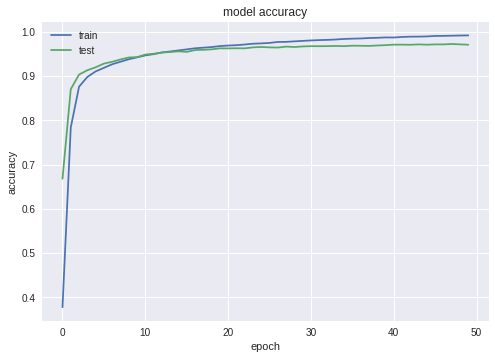

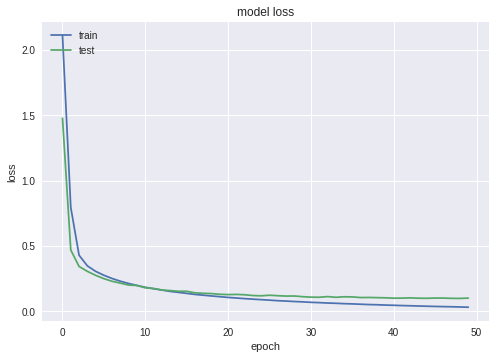

In [12]:
import matplotlib.pyplot as plt

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()






In [13]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Test Score: ", scores[0])
print("Accuracy: " , scores[1])

10000/10000 [==============================] - 1s 54us/step
Test Score:  0.0930896588870557
Accuracy:  0.9743


In [21]:

# Predicting the Test set results
y_pred = model.predict(X_test)

y_test_argmax = y_test.argmax(axis=1)
y_pred_argmax = y_pred.argmax(axis=1)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

cm

array([[  0,  39,   0, 141,   0, 142,   0, 658,   0,   0],
       [  0,  74,   0,  38,   0, 550,   0, 473,   0,   0],
       [  0,  56,   0,  51,   0, 354,   7, 564,   0,   0],
       [  0,   6,   0,  50,   0, 290,   1, 663,   0,   0],
       [  0,  34,   0,  52,   0, 324,   5, 566,   1,   0],
       [  0,  55,   0,  68,   0, 182,  11, 576,   0,   0],
       [  0,  86,   0,  30,   0, 334,   4, 504,   0,   0],
       [  0,  19,   1,  87,   0, 147,   4, 765,   5,   0],
       [  0,  30,   0,  67,   0, 181,   3, 693,   0,   0],
       [  0,  13,   0,  39,   0, 188,   4, 763,   2,   0]])

In [0]:

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [0]:
class_names = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test_argmax, y_pred_argmax, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [6]:
!pip install -U -q PyDrive

    100% |████████████████████████████████| 993kB 21.1MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

In [0]:
model.save('MNIST_3.h5')
classifier_file = drive.CreateFile({'title' : 'MNIST_3.h5'})    
classifier_file.SetContentFile('MNIST_3.h5')    
classifier_file.Upload()